# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [48]:
df = pd.read_csv('df_final.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 29)


,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,idade,mau,...,tempo_emprego,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,False,False,False,True,True,False,False,False,58.832877,False,...,3.106849,False,False,False,True,True,False,False,False,False
1,False,False,False,True,False,False,True,False,52.356164,False,...,8.358904,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,True,False,52.356164,False,...,8.358904,False,False,False,False,True,False,False,False,False
3,True,False,False,False,True,False,False,False,46.224658,False,...,2.106849,False,False,False,True,True,False,False,False,False
4,False,True,False,False,True,False,False,False,29.230137,False,...,3.021918,False,False,False,True,True,False,False,False,False


In [49]:
# Separando a variável resposta e as variáveis explicativas:
X = df.drop('mau', axis=1)  
y = df['mau'] 

# Dividindo o conjunto de dados em 70% para treinamento e 30% para validação:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print("Tamanho do conjunto de treinamento: X_train={}, y_train={}".format(X_train.shape, y_train.shape))
print("Tamanho do conjunto de validação: X_test={}, y_test={}".format(X_test.shape, y_test.shape))


Tamanho do conjunto de treinamento: X_train=(11655, 28), y_train=(11655,)
Tamanho do conjunto de validação: X_test=(4995, 28), y_test=(4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

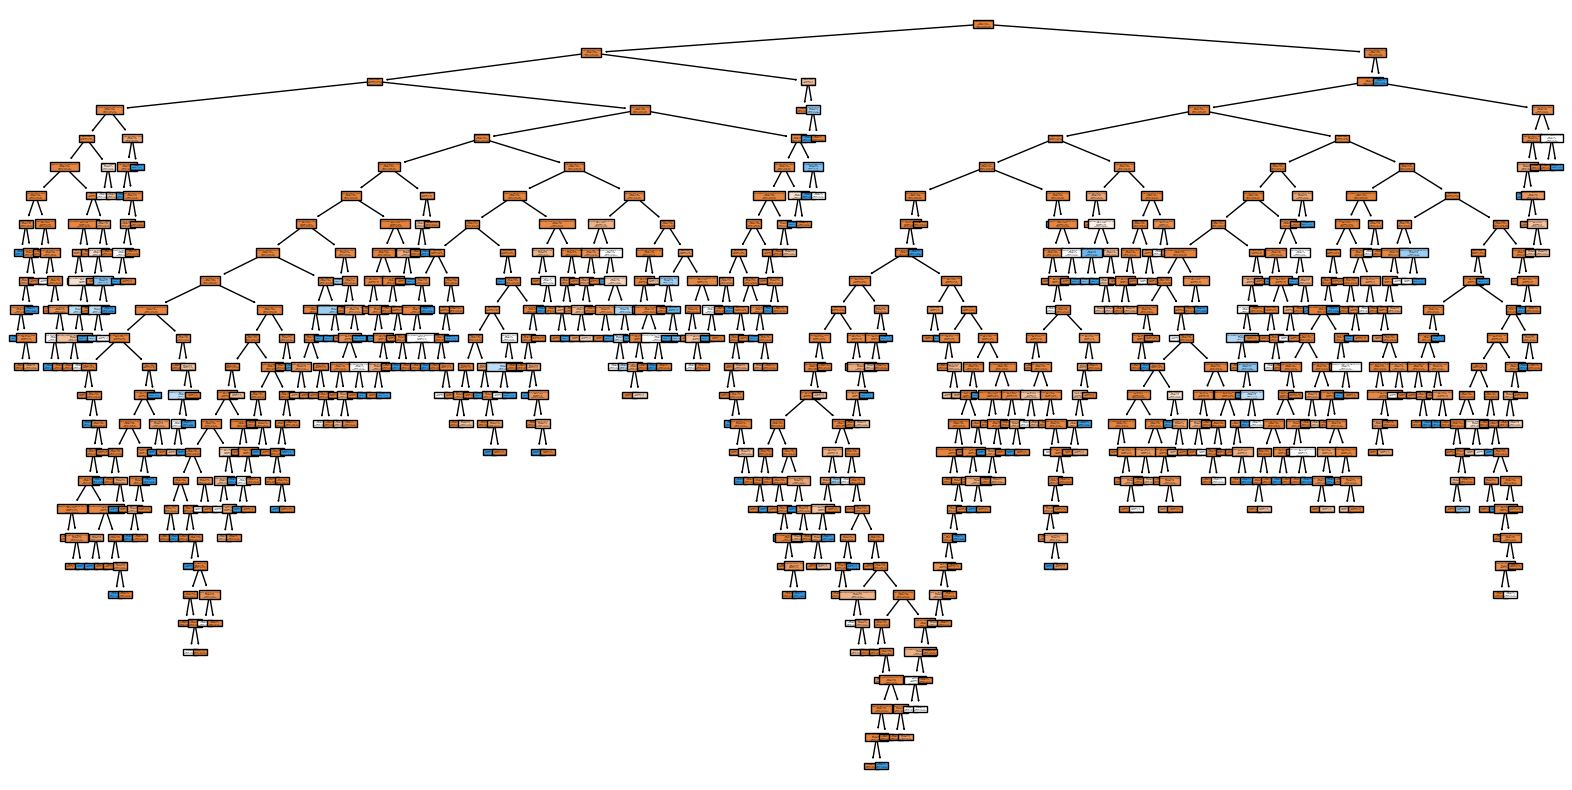

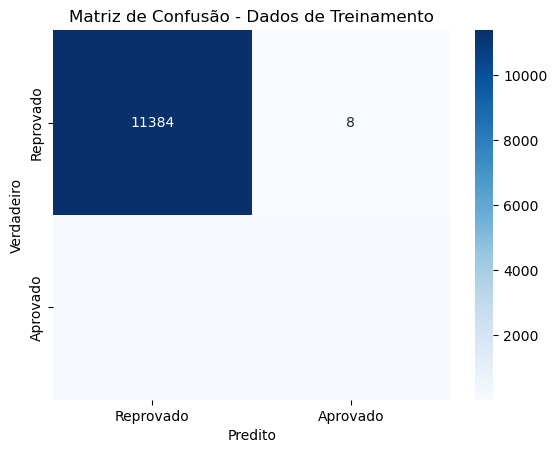

Acurácia na base de treinamento: 99.11%


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# 1. Definindo um objeto com a função da árvore de decisão:
tree_model = DecisionTreeClassifier(random_state=100)

# 2. Treinando o modelo com os dados separados para treinamento:
tree_model.fit(X_train, y_train)

# 3. Visualizando a árvore e aumentando um pouco a figura:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=["Reprovado", "Aprovado"])
plt.show()

# 4. Produzindo uma visualização da matriz de confusão:
y_train_pred = tree_model.predict(X_train)
conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Reprovado', 'Aprovado'], yticklabels=['Reprovado', 'Aprovado'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Dados de Treinamento')
plt.show()

# 5. Calculando a acurácia na base de treinamento:
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Acurácia na base de treinamento: {:.2f}%".format(train_accuracy * 100))


### Modelo com menos folhas:

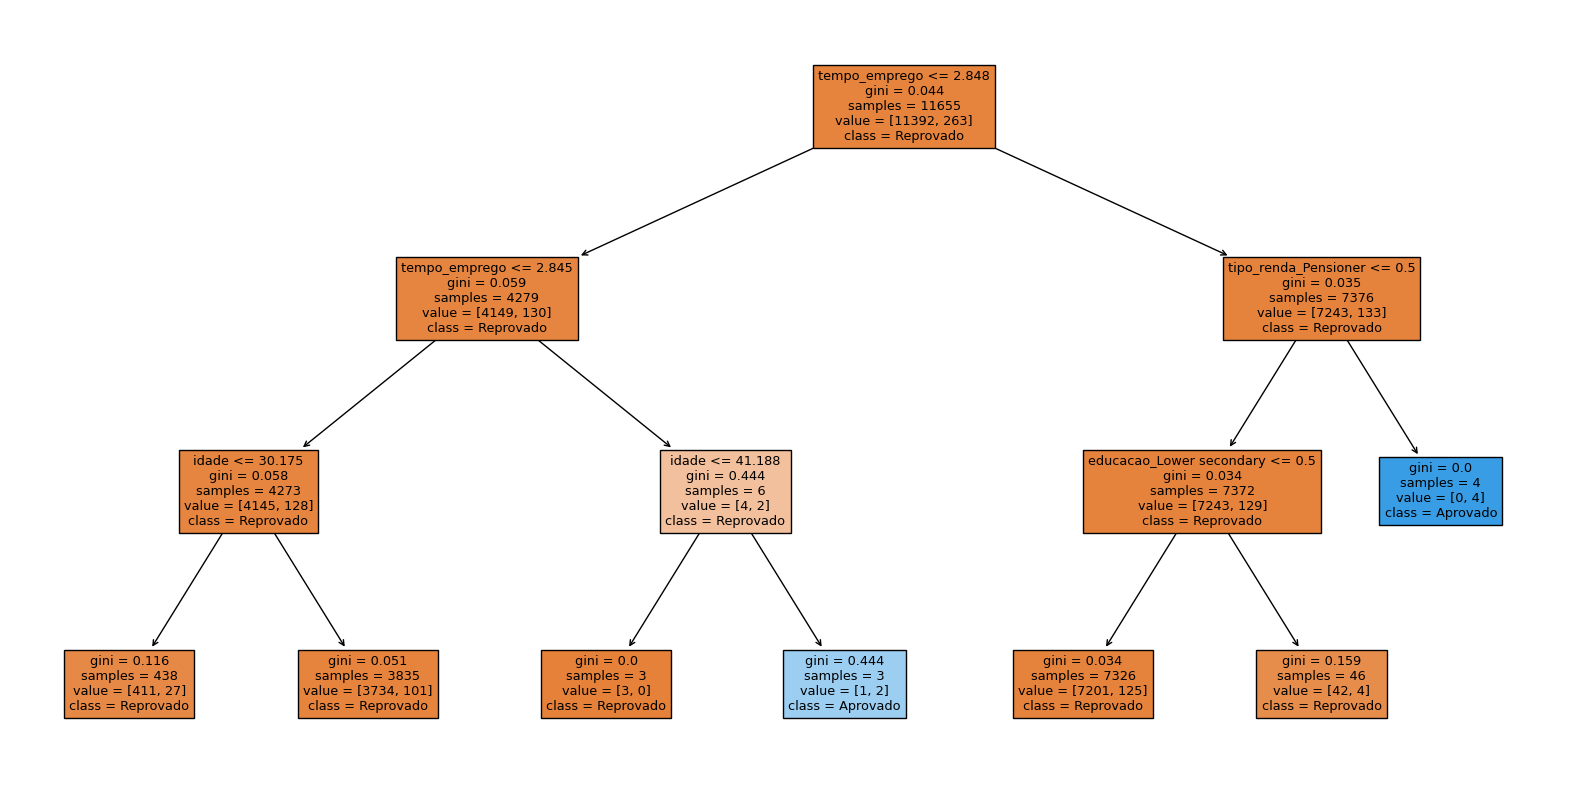

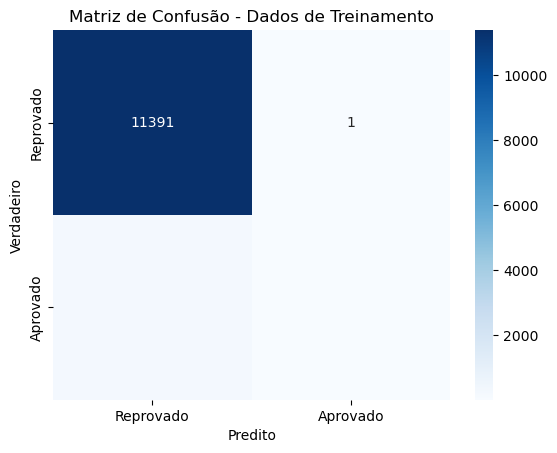

Acurácia na base de treinamento: 97.79%


In [60]:
# 1. Definindo um objeto com a função da árvore de decisão com profundidade máxima de 3:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=100)

# 2. Treinando o modelo com os dados separados para treinamento:
tree_model.fit(X_train, y_train)

# 3. Visualizando a árvore e aumentando um pouco a figura:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=["Reprovado", "Aprovado"])
plt.show()

# 4. Produzindo uma visualização da matriz de confusão:
y_train_pred = tree_model.predict(X_train)
conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Reprovado', 'Aprovado'], yticklabels=['Reprovado', 'Aprovado'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Dados de Treinamento')
plt.show()

# 5. Calculando a acurácia na base de treinamento:
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Acurácia na base de treinamento: {:.2f}%".format(train_accuracy * 100))


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

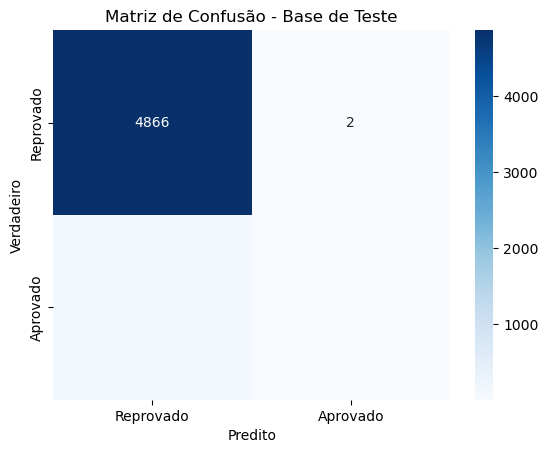

Acurácia na base de teste: 97.44%
Acurácia na base de treinamento: 97.79%


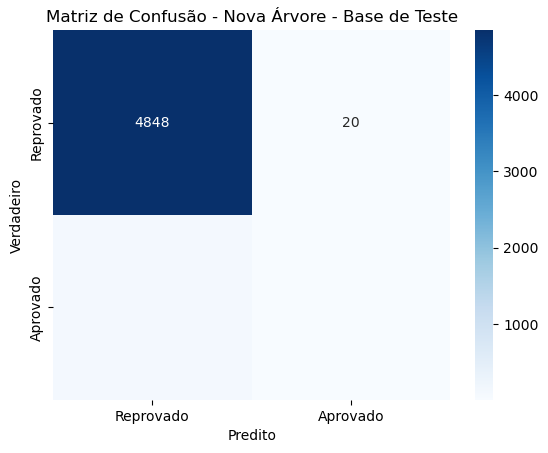

Proporção de proponentes classificados como 'maus': 0.62%
Acurácia se todos os contratos fossem classificados como 'bons': 97.46%


In [64]:
# 1. Definindo um objeto com a função da árvore de decisão com profundidade máxima de 3:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=100)

# 2. Treinando o modelo com os dados separados para treinamento:
tree_model.fit(X_train, y_train)

# Avaliação na base de teste:
# 1. Classificando a base de teste:
y_test_pred = tree_model.predict(X_test)

# 2. Produzindo a visualização da matriz de confusão para a base de teste:
conf_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Reprovado', 'Aprovado'], yticklabels=['Reprovado', 'Aprovado'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Base de Teste')
plt.show()

# 3. Calculando a acurácia da base de teste:
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Acurácia na base de teste: {:.2f}%".format(test_accuracy * 100))

# Comparação com a acurácia da base de treinamento:
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Acurácia na base de treinamento: {:.2f}%".format(train_accuracy * 100))

# 4. Treinando uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10:
new_tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
new_tree_model.fit(X_train, y_train)

# 5. Avaliando a matriz de classificação da nova árvore:
y_test_pred_new = new_tree_model.predict(X_test)
conf_matrix_test_new = metrics.confusion_matrix(y_test, y_test_pred_new)

sns.heatmap(conf_matrix_test_new, annot=True, fmt='d', cmap='Blues', xticklabels=['Reprovado', 'Aprovado'], yticklabels=['Reprovado', 'Aprovado'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Nova Árvore - Base de Teste')
plt.show()

# Proporção de proponentes classificados como 'maus':
prop_maus = np.sum(y_test_pred_new == 1) / len(y_test_pred_new)
print("Proporção de proponentes classificados como 'maus': {:.2f}%".format(prop_maus * 100))

# Calculando a acurácia se todos fossem classificados como 'bons':
all_good_pred = np.zeros_like(y_test)
all_good_accuracy = metrics.accuracy_score(y_test, all_good_pred)
print("Acurácia se todos os contratos fossem classificados como 'bons': {:.2f}%".format(all_good_accuracy * 100))
